In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('csv/flight-loyalty-activity.csv')


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [11]:
# Sumamos los vuelos reservados por mes (usando las columnas dummy)
monthly_flights = df[[
    'month_jan', 'month_feb', 'month_mar', 'month_apr', 'month_may', 'month_jun',
    'month_jul', 'month_aug', 'month_sep', 'month_oct', 'month_nov', 'month_dec'
]].sum().reset_index()
monthly_flights.columns = ['month_name', 'total_flights']

# Mapea los nombres de los meses
monthly_flights['month_name'] = monthly_flights['month_name'].str.replace('month_', '').str.capitalize()

# Define el orden correcto de los meses
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']



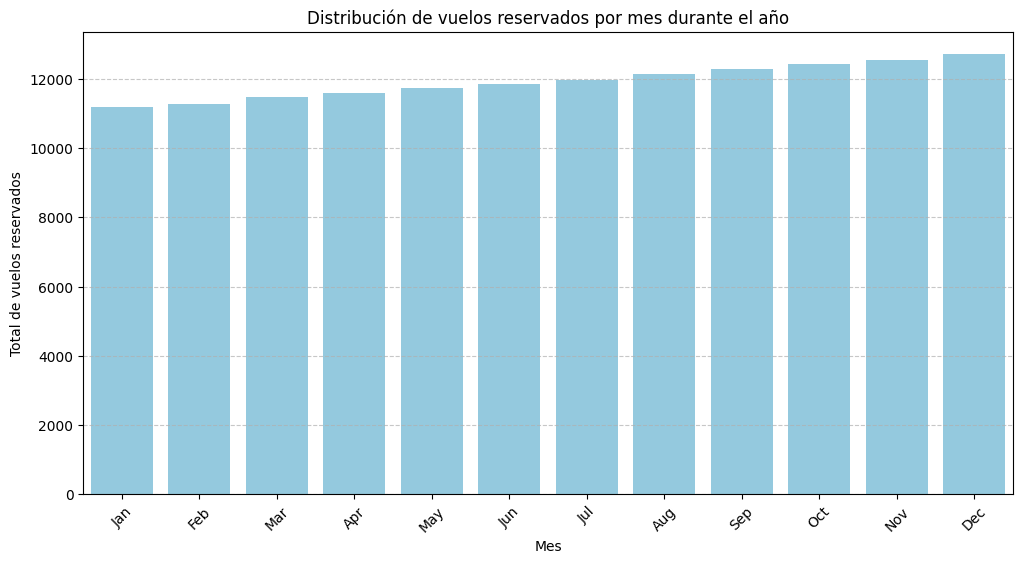

In [12]:

plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_flights,
    x='month_name',
    y='total_flights',
    color='skyblue',
    order=month_order  # Usa el orden definido
)
plt.title('Distribución de vuelos reservados por mes durante el año')
plt.xlabel('Mes')
plt.ylabel('Total de vuelos reservados')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


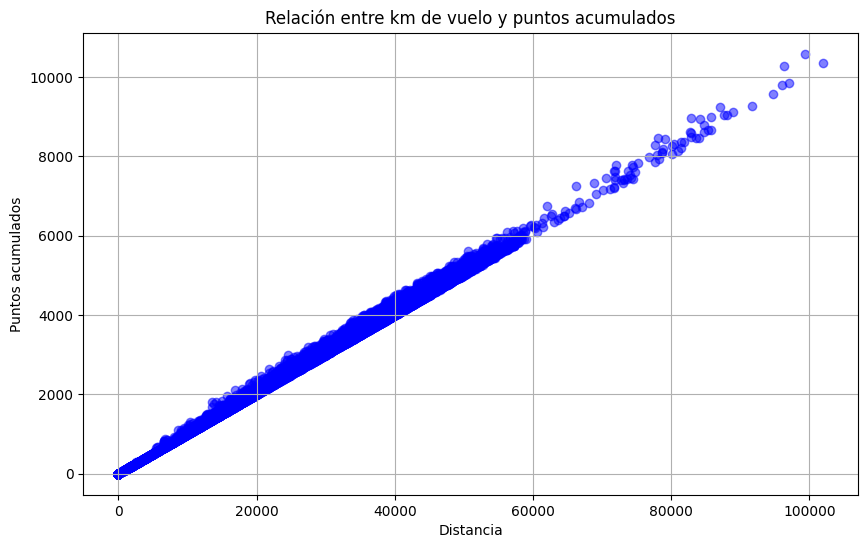

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['total_distance'], df['total_points_accumulated'], alpha=0.5, color='blue')
plt.title('Relación entre km de vuelo y puntos acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos acumulados')
plt.grid(True)
plt.show()


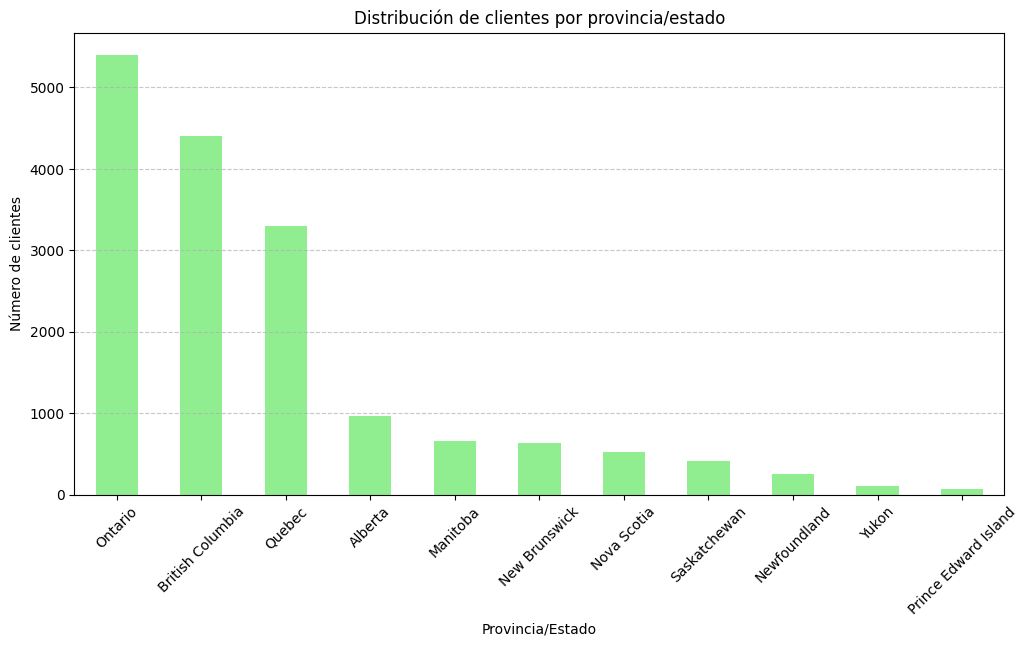

In [4]:
# Conteo de clientes x provincia
clientes_por_provincia = df['province'].value_counts()

# Visualizamos
plt.figure(figsize=(12, 6))
clientes_por_provincia.plot(kind='bar', color='lightgreen')
plt.title('Distribución de clientes por provincia/estado')
plt.xlabel('Provincia/Estado')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


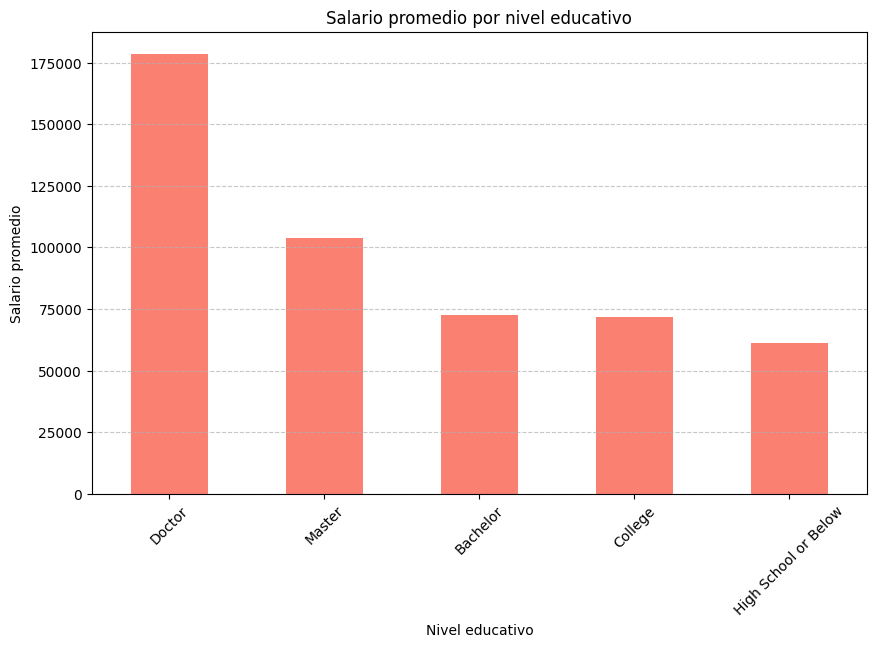

In [5]:
# Calculamos el salario promedio por nivel educativo

salario_promedio_x_educacion = df.groupby('education')['salary'].mean().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
salario_promedio_x_educacion.plot(kind='bar', color='salmon')
plt.title('Salario promedio por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Los datos nulos en el salario asociados con las filas de la columna 'college' los podríamos sustituir por la moda de la columna bachelor,
# perfectamente, ya que son dos niveles formativos prácticamente homólogos


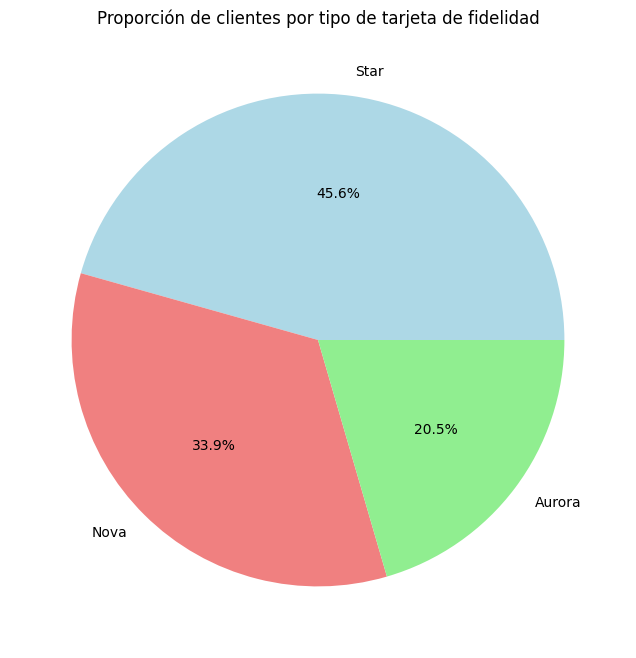

In [6]:
# Hacemos conteo de clientes x tipo de tarjeta
proporcion_tarjetas = df['loyalty_card'].value_counts()

# Visualizamos
plt.figure(figsize=(8, 8))
proporcion_tarjetas.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Proporción de clientes por tipo de tarjeta de fidelidad')
plt.ylabel('')
plt.show()

# next steps: una leyenda, cambiar colores, añadir las cifras reales bajo el porcentaje

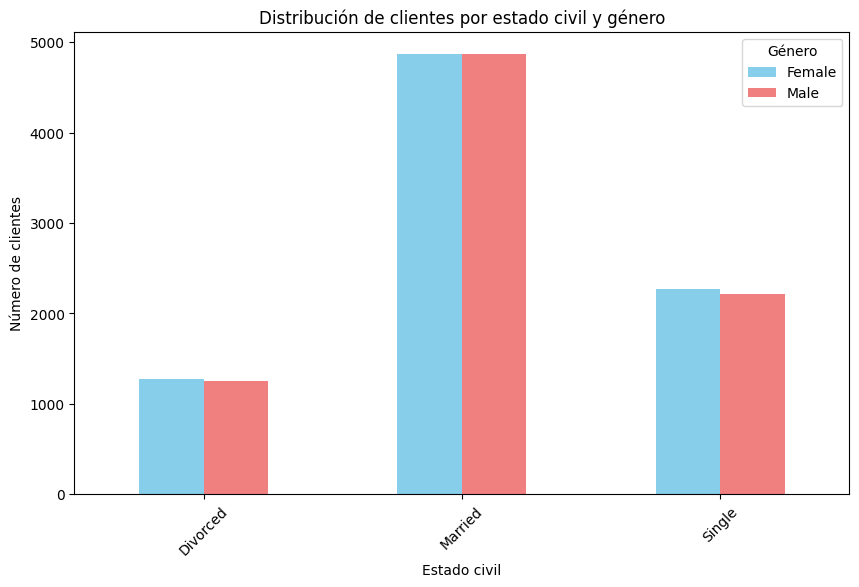

In [7]:
# Creamos tabla
distribucion = pd.crosstab(df['marital_status'], df['gender'])

# Visualizamos la agrupación de barras
distribucion.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Distribución de clientes por estado civil y género')
plt.xlabel('Estado civil')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.show()

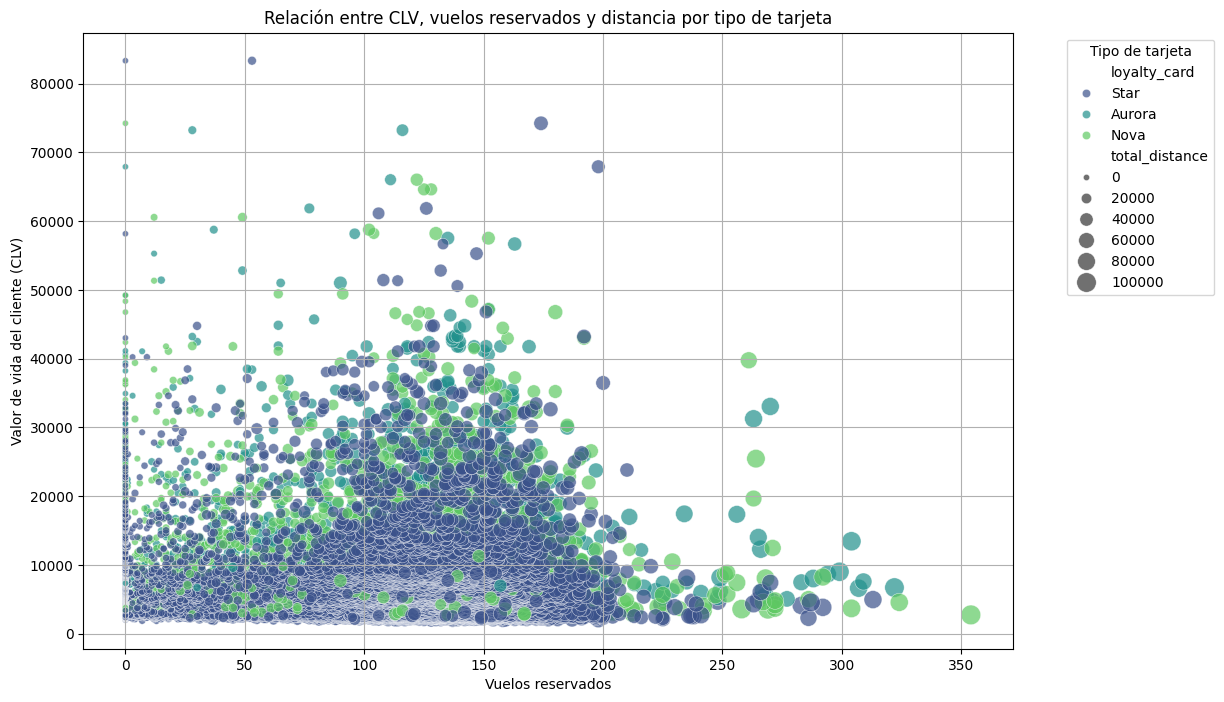

In [8]:
# ¿Cuál es es la relación entre la cantidad estimada de beneficio por cliente para la empresa y la relación de vuelos reservados por estas personas?

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='total_flights_booked',
    y='clv',
    hue='loyalty_card',
    size='total_distance',
    sizes=(20, 200),
    alpha=0.7,
    palette='viridis'
)
plt.title('Relación entre CLV, vuelos reservados y distancia por tipo de tarjeta')
plt.xlabel('Vuelos reservados')
plt.ylabel('Valor de vida del cliente (CLV)')
plt.legend(title='Tipo de tarjeta', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
